# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset: https://www.kaggle.com/datasets/ngshiheng/michelin-guide-restaurants-2021

Import the necessary libraries and create your dataframe(s).

In [2]:
# Importing Pandas to clean data.
# Importing SQLite3 for easier querying of data.
# Importing Matplotlib, Matplotlib.pyplot, Seaborn, and Numpy for visualiztion.

import pandas as pd
import sqlite3 as sl
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Reading data.
df1 = pd.read_csv('Michelin Guide Data.csv')

# Renamed Url to MichelinGuideUrl for clarity.
# Switched Latitude (North-South) and Longitude (East-West) columns for easy plug-in into maps.
df1.rename(columns={"Url": "MichelinGuideUrl"}, inplace=True)
df2 = df1.iloc[:,[0,1,2,3,4,6,5,7,8,9,10,11]]

df2

,Name,Address,Location,Price,Cuisine,Latitude,Longitude,PhoneNumber,MichelinGuideUrl,WebsiteUrl,Award,FacilitiesAndServices
0,Quince,"470 Pacific Ave., San Francisco, 94133, USA","San Francisco, USA",$$$$,"Contemporary, Californian",37.797505,-122.403261,1.415776e+10,https://guide.michelin.com/en/california/san-f...,http://www.quincerestaurant.com,3 MICHELIN Stars,"Air conditioning,American Express credit card,..."
1,Atelier Crenn,"3127 Fillmore St., San Francisco, 94123, USA","San Francisco, USA",$$$$,"Contemporary, French",37.798350,-122.435860,1.415440e+10,https://guide.michelin.com/en/california/san-f...,https://www.ateliercrenn.com/,3 MICHELIN Stars,"Air conditioning,Credit card / Debit card acce..."
2,Addison,"5200 Grand Del Mar Way, San Diego, 92130, USA","San Diego, USA",$$$$,"Contemporary, Californian",32.941297,-117.198891,1.858314e+10,https://guide.michelin.com/en/california/us-sa...,https://www.addisondelmar.com/,3 MICHELIN Stars,"Air conditioning,American Express credit card,..."
3,Manresa,"320 Village Ln., Los Gatos, 95030, USA","Los Gatos, USA",$$$$,"Contemporary, Californian",37.227610,-121.980710,1.408354e+10,https://guide.michelin.com/en/california/los-g...,https://www.manresarestaurant.com/,3 MICHELIN Stars,"Air conditioning,Credit card / Debit card acce..."
4,Benu,"22 Hawthorne St., San Francisco, 94105, USA","San Francisco, USA",$$$$,"Asian, Contemporary",37.785376,-122.399060,1.415685e+10,https://guide.michelin.com/en/california/san-f...,https://www.benusf.com/,3 MICHELIN Stars,"Air conditioning,Credit card / Debit card acce..."
...,...,...,...,...,...,...,...,...,...,...,...,...
6790,Szóstka,"Plac Powstańców Warszawy 9, Warsaw, 00 039, Po...","Warsaw, Poland",€€,"Polish, Modern Cuisine",52.235803,21.012698,4.822470e+10,https://guide.michelin.com/en/masovia/warsaw/r...,https://warszawa.hotel.com.pl/hotel-warszawa,Bib Gourmand,"Air conditioning,American Express credit card,..."
6791,Fiorentina,"ul. Grodzka 63, Cracow, 31 044, Poland","Cracow, Poland",€€,"Creative, Polish",50.055898,19.938179,4.812426e+10,https://guide.michelin.com/en/lesser-poland/cr...,https://fiorentina.com.pl/,Bib Gourmand,"Air conditioning,American Express credit card,..."
6792,Zazie,"ul. Józefa 34, Cracow, 32 056, Poland","Cracow, Poland",€,French,50.051240,19.946949,4.850041e+10,https://guide.michelin.com/en/lesser-poland/cr...,http://www.zaziebistro.pl/,Bib Gourmand,"Air conditioning,Booking essential - dinner,Cr..."
6793,Butchery & Wine,"ul. Żurawia 22, Warsaw, 00 515, Poland","Warsaw, Poland",€€,"Meats and Grills, Traditional Cuisine",52.228581,21.015495,4.822502e+10,https://guide.michelin.com/en/masovia/warsaw/r...,https://www.butcheryandwine.pl/,Bib Gourmand,"American Express credit card,Booking essential..."


## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

In [3]:
# Null values:
df2.isnull().sum()

# Notes:
    # 57 restaurants don't have a price range.
    # 130 restaurants don't have a phone number.
    # 1232 restaurants don't have a website.
    # 48 restaurants don't have a description of facilities and services.

Name                        0
Address                     0
Location                    0
Price                      57
Cuisine                     0
Latitude                    0
Longitude                   0
PhoneNumber               130
MichelinGuideUrl            0
WebsiteUrl               1232
Award                       0
FacilitiesAndServices      48
dtype: int64

<AxesSubplot:>

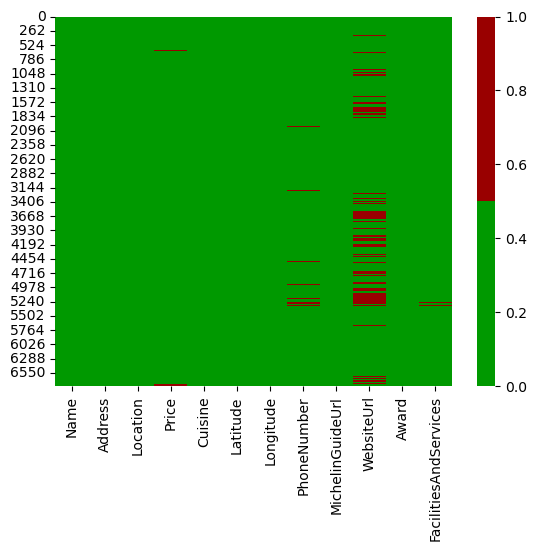

In [4]:
# Heatmap:
colours = ['#009900', '#990000']
sns.heatmap(df2.isnull(), cmap=sns.color_palette(colours))

In [5]:
# Percentage:
for col in df2.columns:
    pct_missing = np.mean(df2[col].isnull())
    print('{} - {}%'.format(col, pct_missing*100))

# Notes:
    # Website Url has the most missing values, but is still fairly low at 18%.

Name - 0.0%
Address - 0.0%
Location - 0.0%
Price - 0.8388520971302429%
Cuisine - 0.0%
Latitude - 0.0%
Longitude - 0.0%
PhoneNumber - 1.9131714495952907%
MichelinGuideUrl - 0.0%
WebsiteUrl - 18.130978660779988%
Award - 0.0%
FacilitiesAndServices - 0.7064017660044151%


<AxesSubplot:xlabel='index'>

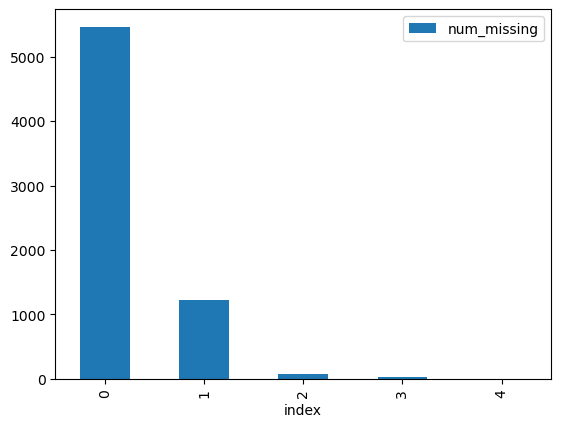

In [6]:
# Histogram:
df2_missing = df2.copy()
for col in df2_missing.columns:
    missing = df2_missing[col].isnull()
    num_missing = np.sum(missing)
    if num_missing > 0:
        df2_missing['{}_ismissing'.format(col)] = missing
        
ismissing_cols = [col for col in df2_missing.columns if 'ismissing' in col]
df2_missing['num_missing'] = df2_missing[ismissing_cols].sum(axis=1)
df2_missing['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

# Notes:
    # Most entries/restuarants don't have missing values.

In [7]:
# Will fill in null values in Facilities and Services with "None."
# Will convert PhoneNumber and Website Url to boolean: True if value exists and False if null.
# Will leave other columns with nulls as-is for now, to be dealt with later.
df2['FacilitiesAndServices'] = df2['FacilitiesAndServices'].fillna('None')
df2['HasPhone'] = df2['PhoneNumber'].notnull()
df2['HasWebsite'] = df2['WebsiteUrl'].notnull()
df2

,Name,Address,Location,Price,Cuisine,Latitude,Longitude,PhoneNumber,MichelinGuideUrl,WebsiteUrl,Award,FacilitiesAndServices,HasPhone,HasWebsite
0,Quince,"470 Pacific Ave., San Francisco, 94133, USA","San Francisco, USA",$$$$,"Contemporary, Californian",37.797505,-122.403261,1.415776e+10,https://guide.michelin.com/en/california/san-f...,http://www.quincerestaurant.com,3 MICHELIN Stars,"Air conditioning,American Express credit card,...",True,True
1,Atelier Crenn,"3127 Fillmore St., San Francisco, 94123, USA","San Francisco, USA",$$$$,"Contemporary, French",37.798350,-122.435860,1.415440e+10,https://guide.michelin.com/en/california/san-f...,https://www.ateliercrenn.com/,3 MICHELIN Stars,"Air conditioning,Credit card / Debit card acce...",True,True
2,Addison,"5200 Grand Del Mar Way, San Diego, 92130, USA","San Diego, USA",$$$$,"Contemporary, Californian",32.941297,-117.198891,1.858314e+10,https://guide.michelin.com/en/california/us-sa...,https://www.addisondelmar.com/,3 MICHELIN Stars,"Air conditioning,American Express credit card,...",True,True
3,Manresa,"320 Village Ln., Los Gatos, 95030, USA","Los Gatos, USA",$$$$,"Contemporary, Californian",37.227610,-121.980710,1.408354e+10,https://guide.michelin.com/en/california/los-g...,https://www.manresarestaurant.com/,3 MICHELIN Stars,"Air conditioning,Credit card / Debit card acce...",True,True
4,Benu,"22 Hawthorne St., San Francisco, 94105, USA","San Francisco, USA",$$$$,"Asian, Contemporary",37.785376,-122.399060,1.415685e+10,https://guide.michelin.com/en/california/san-f...,https://www.benusf.com/,3 MICHELIN Stars,"Air conditioning,Credit card / Debit card acce...",True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6790,Szóstka,"Plac Powstańców Warszawy 9, Warsaw, 00 039, Po...","Warsaw, Poland",€€,"Polish, Modern Cuisine",52.235803,21.012698,4.822470e+10,https://guide.michelin.com/en/masovia/warsaw/r...,https://warszawa.hotel.com.pl/hotel-warszawa,Bib Gourmand,"Air conditioning,American Express credit card,...",True,True
6791,Fiorentina,"ul. Grodzka 63, Cracow, 31 044, Poland","Cracow, Poland",€€,"Creative, Polish",50.055898,19.938179,4.812426e+10,https://guide.michelin.com/en/lesser-poland/cr...,https://fiorentina.com.pl/,Bib Gourmand,"Air conditioning,American Express credit card,...",True,True
6792,Zazie,"ul. Józefa 34, Cracow, 32 056, Poland","Cracow, Poland",€,French,50.051240,19.946949,4.850041e+10,https://guide.michelin.com/en/lesser-poland/cr...,http://www.zaziebistro.pl/,Bib Gourmand,"Air conditioning,Booking essential - dinner,Cr...",True,True
6793,Butchery & Wine,"ul. Żurawia 22, Warsaw, 00 515, Poland","Warsaw, Poland",€€,"Meats and Grills, Traditional Cuisine",52.228581,21.015495,4.822502e+10,https://guide.michelin.com/en/masovia/warsaw/r...,https://www.butcheryandwine.pl/,Bib Gourmand,"American Express credit card,Booking essential...",True,True


## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

In [8]:
# Use describe()
df2.describe()

,Latitude,Longitude,PhoneNumber
count,6795.000000,6795.000000,6.665000e+03
mean,40.177020,28.054437,3.272592e+11
std,12.391614,66.677173,1.597814e+12
min,-23.638434,-123.719444,4.977184e+07
25%,35.660931,0.808880,3.314233e+10
50%,43.303083,7.748413,3.905532e+10
75%,48.630898,100.544771,8.867693e+10
max,64.144656,139.847604,4.981419e+13


<AxesSubplot:>

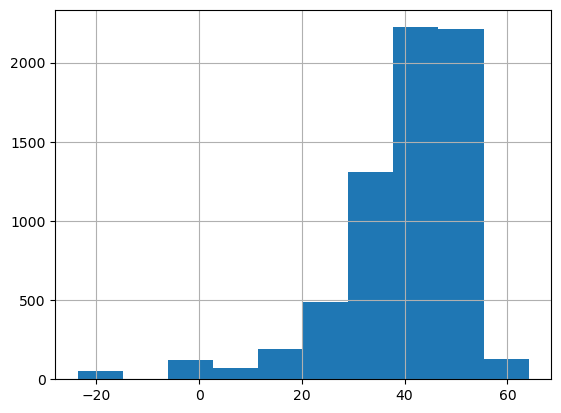

In [9]:
# Histogram for latitude to detect outliers
df2['Latitude'].hist()

# Notes:
    # No histogram for longitude, because Earth is populated 360o around, while the North/South poles are uninhabited.
    # While -20 degrees is somewhat of an outlier, these will be kept.
    # The fact that there are very few latitudes between -20 and 0 could mean something. (Note that Australia is around -20o.)


Box Plot for Latitude


<AxesSubplot:>

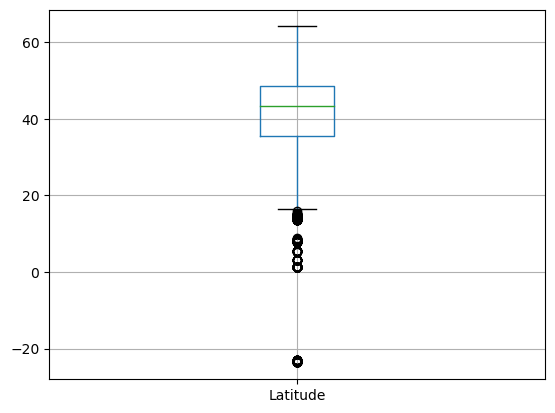

In [20]:
# Box plot for latitude to detect outliers
print('Box Plot for Latitude')
df2.boxplot(column=['Latitude'])

# Notes:
    # Again, -20 seems to be an outlier, but these will be kept instead of deleted.
    # More striking is the lack of values between -20 and 0. Where are the restaurants in Sub-Saharan Africa or South America?

## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

In [11]:
# Find and drop duplicates:
df3 = df2.drop_duplicates()
print(df2.shape)
print(df3.shape)

# Notes:
    # No duplicates.

(6795, 14)
(6795, 14)


In [12]:
# Removing PhoneNumber, WebsiteUrl. Columns have been converted to booleans HasPhone and HasWebsite.
# Removing Michelin Guide Url. Column isn't relevant to the analysis.
# Also removing Address since latitude and longitude are available to pinpoint the location of the restaurant for mapping.
df4 = df3.drop(['PhoneNumber','WebsiteUrl','MichelinGuideUrl','Address'], axis=1)
df4

,Name,Location,Price,Cuisine,Latitude,Longitude,Award,FacilitiesAndServices,HasPhone,HasWebsite
0,Quince,"San Francisco, USA",$$$$,"Contemporary, Californian",37.797505,-122.403261,3 MICHELIN Stars,"Air conditioning,American Express credit card,...",True,True
1,Atelier Crenn,"San Francisco, USA",$$$$,"Contemporary, French",37.798350,-122.435860,3 MICHELIN Stars,"Air conditioning,Credit card / Debit card acce...",True,True
2,Addison,"San Diego, USA",$$$$,"Contemporary, Californian",32.941297,-117.198891,3 MICHELIN Stars,"Air conditioning,American Express credit card,...",True,True
3,Manresa,"Los Gatos, USA",$$$$,"Contemporary, Californian",37.227610,-121.980710,3 MICHELIN Stars,"Air conditioning,Credit card / Debit card acce...",True,True
4,Benu,"San Francisco, USA",$$$$,"Asian, Contemporary",37.785376,-122.399060,3 MICHELIN Stars,"Air conditioning,Credit card / Debit card acce...",True,True
...,...,...,...,...,...,...,...,...,...,...
6790,Szóstka,"Warsaw, Poland",€€,"Polish, Modern Cuisine",52.235803,21.012698,Bib Gourmand,"Air conditioning,American Express credit card,...",True,True
6791,Fiorentina,"Cracow, Poland",€€,"Creative, Polish",50.055898,19.938179,Bib Gourmand,"Air conditioning,American Express credit card,...",True,True
6792,Zazie,"Cracow, Poland",€,French,50.051240,19.946949,Bib Gourmand,"Air conditioning,Booking essential - dinner,Cr...",True,True
6793,Butchery & Wine,"Warsaw, Poland",€€,"Meats and Grills, Traditional Cuisine",52.228581,21.015495,Bib Gourmand,"American Express credit card,Booking essential...",True,True


In [13]:
# For Location, keeping country and removing the city, as the latter is too finely detailed for this analysis.
df4[['LocationCity','LocationCountry']] = df4['Location'].str.split(', ',expand=True)
df4['LocationCountry'].fillna(df4['LocationCity'], inplace=True)
df5 = df4.drop(['Location','LocationCity'], axis=1)
df5

,Name,Price,Cuisine,Latitude,Longitude,Award,FacilitiesAndServices,HasPhone,HasWebsite,LocationCountry
0,Quince,$$$$,"Contemporary, Californian",37.797505,-122.403261,3 MICHELIN Stars,"Air conditioning,American Express credit card,...",True,True,USA
1,Atelier Crenn,$$$$,"Contemporary, French",37.798350,-122.435860,3 MICHELIN Stars,"Air conditioning,Credit card / Debit card acce...",True,True,USA
2,Addison,$$$$,"Contemporary, Californian",32.941297,-117.198891,3 MICHELIN Stars,"Air conditioning,American Express credit card,...",True,True,USA
3,Manresa,$$$$,"Contemporary, Californian",37.227610,-121.980710,3 MICHELIN Stars,"Air conditioning,Credit card / Debit card acce...",True,True,USA
4,Benu,$$$$,"Asian, Contemporary",37.785376,-122.399060,3 MICHELIN Stars,"Air conditioning,Credit card / Debit card acce...",True,True,USA
...,...,...,...,...,...,...,...,...,...,...
6790,Szóstka,€€,"Polish, Modern Cuisine",52.235803,21.012698,Bib Gourmand,"Air conditioning,American Express credit card,...",True,True,Poland
6791,Fiorentina,€€,"Creative, Polish",50.055898,19.938179,Bib Gourmand,"Air conditioning,American Express credit card,...",True,True,Poland
6792,Zazie,€,French,50.051240,19.946949,Bib Gourmand,"Air conditioning,Booking essential - dinner,Cr...",True,True,Poland
6793,Butchery & Wine,€€,"Meats and Grills, Traditional Cuisine",52.228581,21.015495,Bib Gourmand,"American Express credit card,Booking essential...",True,True,Poland


In [14]:
# For Price, there are two things being reflected here: currency and priciness.
# Thus, separate into two columns and delete Price column.
df5['Currency'] = df5['Price'].str[:1]
df5['Priciness'] = df5['Price'].str.len()
df6 = df5.drop(['Price'], axis=1)
df6

,Name,Cuisine,Latitude,Longitude,Award,FacilitiesAndServices,HasPhone,HasWebsite,LocationCountry,Currency,Priciness
0,Quince,"Contemporary, Californian",37.797505,-122.403261,3 MICHELIN Stars,"Air conditioning,American Express credit card,...",True,True,USA,$,4.0
1,Atelier Crenn,"Contemporary, French",37.798350,-122.435860,3 MICHELIN Stars,"Air conditioning,Credit card / Debit card acce...",True,True,USA,$,4.0
2,Addison,"Contemporary, Californian",32.941297,-117.198891,3 MICHELIN Stars,"Air conditioning,American Express credit card,...",True,True,USA,$,4.0
3,Manresa,"Contemporary, Californian",37.227610,-121.980710,3 MICHELIN Stars,"Air conditioning,Credit card / Debit card acce...",True,True,USA,$,4.0
4,Benu,"Asian, Contemporary",37.785376,-122.399060,3 MICHELIN Stars,"Air conditioning,Credit card / Debit card acce...",True,True,USA,$,4.0
...,...,...,...,...,...,...,...,...,...,...,...
6790,Szóstka,"Polish, Modern Cuisine",52.235803,21.012698,Bib Gourmand,"Air conditioning,American Express credit card,...",True,True,Poland,€,2.0
6791,Fiorentina,"Creative, Polish",50.055898,19.938179,Bib Gourmand,"Air conditioning,American Express credit card,...",True,True,Poland,€,2.0
6792,Zazie,French,50.051240,19.946949,Bib Gourmand,"Air conditioning,Booking essential - dinner,Cr...",True,True,Poland,€,1.0
6793,Butchery & Wine,"Meats and Grills, Traditional Cuisine",52.228581,21.015495,Bib Gourmand,"American Express credit card,Booking essential...",True,True,Poland,€,2.0


In [15]:
# Going back and dealing with null values.
df6['Currency'] = df6['Currency'].fillna('None')
df6['Priciness'] = df6['Priciness'].fillna('None')
df6.isnull().sum()

Name                     0
Cuisine                  0
Latitude                 0
Longitude                0
Award                    0
FacilitiesAndServices    0
HasPhone                 0
HasWebsite               0
LocationCountry          0
Currency                 0
Priciness                0
dtype: int64

## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

In [23]:
# Check value counts.
print(df6['Award'].value_counts())
print()
print(df6['HasPhone'].value_counts())
print()
print(df6['HasWebsite'].value_counts())
print()
print(df6['LocationCountry'].value_counts())
print()
print('Number of Awards by Currency')
print(df6['Currency'].value_counts())
print()
print('Number of Awards by Priciness')
print(df6['Priciness'].value_counts())

# Notes:
    # No true inconsistencies found.
    # Although, what is going on with "Taipei & Taichung" being labeled as a country? These are cities in Taiwan.

Bib Gourmand        3416
1 MICHELIN Star     2753
2 MICHELIN Stars     484
3 MICHELIN Stars     142
Name: Award, dtype: int64

True     6665
False     130
Name: HasPhone, dtype: int64

True     5563
False    1232
Name: HasWebsite, dtype: int64

France            1049
Japan              855
Italy              642
USA                603
Germany            600
Spain              492
Switzerland        278
Belgium            269
United Kingdom     268
Netherlands        225
Thailand           224
China Mainland     201
Taiwan             179
Hong Kong          135
Singapore          119
South Korea         92
Portugal            76
Brazil              51
Canada              50
Denmark             44
Malaysia            36
Ireland             36
Sweden              33
Austria             28
Dubai               25
Macau               22
Croatia             22
Norway              17
Slovenia            17
Luxembourg          16
Türkiye             15
Hungary             15
Greece             

In [21]:
# Rename "Taipei & Taichung" to "Taiwan".
df6['LocationCountry'] = df6['LocationCountry'].replace({'Taipei & Taichung':'Taiwan'})
print('Number of Awards by Country')
print(df6['LocationCountry'].value_counts())

Number of Awards by Country
France            1049
Japan              855
Italy              642
USA                603
Germany            600
Spain              492
Switzerland        278
Belgium            269
United Kingdom     268
Netherlands        225
Thailand           224
China Mainland     201
Taiwan             179
Hong Kong          135
Singapore          119
South Korea         92
Portugal            76
Brazil              51
Canada              50
Denmark             44
Malaysia            36
Ireland             36
Sweden              33
Austria             28
Dubai               25
Macau               22
Croatia             22
Norway              17
Slovenia            17
Luxembourg          16
Türkiye             15
Hungary             15
Greece              12
Finland              9
Malta                9
Abu Dhabi            7
Estonia              7
Czech Republic       7
Poland               6
Iceland              2
Andorra              1
Serbia               1
Name: 

In [18]:
#Switch around columns.
df7 = df6.iloc[:,[0,8,2,3,1,9,10,6,7,5,4]]
df7

,Name,LocationCountry,Latitude,Longitude,Cuisine,Currency,Priciness,HasPhone,HasWebsite,FacilitiesAndServices,Award
0,Quince,USA,37.797505,-122.403261,"Contemporary, Californian",$,4.0,True,True,"Air conditioning,American Express credit card,...",3 MICHELIN Stars
1,Atelier Crenn,USA,37.798350,-122.435860,"Contemporary, French",$,4.0,True,True,"Air conditioning,Credit card / Debit card acce...",3 MICHELIN Stars
2,Addison,USA,32.941297,-117.198891,"Contemporary, Californian",$,4.0,True,True,"Air conditioning,American Express credit card,...",3 MICHELIN Stars
3,Manresa,USA,37.227610,-121.980710,"Contemporary, Californian",$,4.0,True,True,"Air conditioning,Credit card / Debit card acce...",3 MICHELIN Stars
4,Benu,USA,37.785376,-122.399060,"Asian, Contemporary",$,4.0,True,True,"Air conditioning,Credit card / Debit card acce...",3 MICHELIN Stars
...,...,...,...,...,...,...,...,...,...,...,...
6790,Szóstka,Poland,52.235803,21.012698,"Polish, Modern Cuisine",€,2.0,True,True,"Air conditioning,American Express credit card,...",Bib Gourmand
6791,Fiorentina,Poland,50.055898,19.938179,"Creative, Polish",€,2.0,True,True,"Air conditioning,American Express credit card,...",Bib Gourmand
6792,Zazie,Poland,50.051240,19.946949,French,€,1.0,True,True,"Air conditioning,Booking essential - dinner,Cr...",Bib Gourmand
6793,Butchery & Wine,Poland,52.228581,21.015495,"Meats and Grills, Traditional Cuisine",€,2.0,True,True,"American Express credit card,Booking essential...",Bib Gourmand


In [19]:
# Save a copy of the cleaned data for Assignment 4, Checkpoint 4.
df7.to_csv('Michelin Guide Data_Cleaned.csv', index=False)

## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset?
    * No, not any inconsistencies.
2. Did the process of cleaning your data give you new insights into your dataset?
    * Yes. Countries restaurants are located in are mostly in Europe and Asia; very few are in South America, and none are in Africa.
    * Very few currencies are represented.
3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations?
    * Will still need to deal with the problem of multiple values combined into one column (under Cuisine and Facilities and Services).